# Intro

The DS/ML section discusses the python packages/frameworks specialised for building database systems and machine learning.

## Hugging Face

Huggingface is an ecosystem of packages that are related to all aspects of working with deep learning objects.

The first thing you need to do is log in:

`huggingface-cli login --token <your HF token>`

The following table shows the structure of the ecosystem:

| Package                           | Purpose                                                                                                                              |
| --------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------ |
| **🤗 Hub (`huggingface_hub`)**    | Central repository for models, datasets, and Spaces. Lets you push/pull models and datasets.                                         |
| **Transformers (`transformers`)** | High-level library with pretrained NLP, vision, and multimodal models. Handles training, inference, and tokenization (via wrappers). |
| **Tokenizers (`tokenizers`)**     | Fast, low-level text tokenization library (written in Rust). Often used inside `transformers`.                                       |
| **Datasets (`datasets`)**         | Efficient dataset loading, processing, and streaming. Optimized for large ML datasets.                                               |
| **Evaluate (`evaluate`)**         | Standardized evaluation metrics library. Works well with `datasets` and `transformers`.                                              |
| **Diffusers (`diffusers`)**       | Library for diffusion models (e.g., Stable Diffusion) for images, audio, video.                                                      |
| **Accelerate (`accelerate`)**     | Utility for running training on any hardware setup (CPU, GPU, multi-GPU, TPU) with minimal code changes.                             |
| **PEFT (`peft`)**                 | Parameter-Efficient Fine-Tuning library (LoRA, adapters, etc.) for large models.                                                     |
| **Optimum (`optimum`)**           | Optimizations for transformers (ONNX, quantization, hardware-specific acceleration).                                                 |
| **Smollagents (`smolagents`)**    | Building agentic systems.                                                                                                            |
| **Gradio (`gradio`)** (partnered) | Simple UI framework to demo models in the browser.                                                                                   |

Find out more: 

- [LLM course](https://huggingface.co/learn/llm-course/chapter0/1) from hugging face.
- The [Hugging Face](hugging_face.ipynb) page.

## Spark

Spark is a framework for processing large amounts of data. This section covers its Python SDK.

For more details, check the [Spark](spark.ipynb) page.

---

The following cell demonstrates how to create a Spark session, define a data frame, and display it in the framework.

In [2]:
from pyspark.sql import SparkSession

spark_session = SparkSession.builder.appName("Temp").getOrCreate()
spark_session.createDataFrame(
    data=[
        ("Fedor", 500),
        ("Alice", 700),
        ("Bob", 1400)
    ],
    schema=("Name", "Salary")
).show()

+-----+------+
| Name|Salary|
+-----+------+
|Fedor|   500|
|Alice|   700|
|  Bob|  1400|
+-----+------+



## Sentence transformer

The sentence transformer package implements models for building embeddings from sets of texts. Check [SBERT](https://sbert.net/) page for mode details.

---

Consider a basic example of using the `sentence_transformers` package.

The following cell loads the model and displays the type. It's a special object that build to privide specific interfaces associated with building embeddings.

In [12]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer("all-MiniLM-L6-v2")
type(model)

sentence_transformers.SentenceTransformer.SentenceTransformer

The obtained object have an `encode` method - that takes a range of texts and returns `numpy.array` of embeddings.

In [15]:
sentences = [
    "The weather is lovely today.",
    "It's so sunny outside!",
    "He drove to the stadium.",
]

embeddings = model.encode(sentences)
print(embeddings.shape)
embeddings

(3, 384)


array([[ 0.01919573,  0.12008536,  0.15959828, ..., -0.0053629 ,
        -0.08109505,  0.05021338],
       [-0.01869039,  0.04151868,  0.07431544, ...,  0.00486597,
        -0.06190442,  0.03187514],
       [ 0.136502  ,  0.08227322, -0.02526165, ...,  0.08762047,
         0.03045845, -0.01075752]], shape=(3, 384), dtype=float32)

The following cell uses the `similarity` method to create a matrix of the embeddings' similarities.

In [16]:
similarities = model.similarity(embeddings, embeddings)
similarities

tensor([[1.0000, 0.6660, 0.1046],
        [0.6660, 1.0000, 0.1411],
        [0.1046, 0.1411, 1.0000]])

## LangChain

The Lang chain is the core library for developing modern, agent-based solutions. The following table lists and describes the central components of the lang chain package.

| Component | Analogy | Description |
| :--- | :--- | :--- |
| **Models** | The brains | These are the core language models (LLMs) that handle the actual work, like generating text, holding conversations, or creating embeddings. |
| **Prompts** | The instructions | These are the templates used to provide specific instructions and context to the models. They ensure the model responds in a consistent and desired format. |
| **Chains** | The workflow | A way to link multiple components together into a single, automated sequence. This allows you to perform multi-step tasks, like combining a prompt with a model call. |
| **Agents** | The reasoning engine | A more advanced chain that uses an LLM to decide which external **Tools** to use to achieve a goal. It can think, act, and observe, repeating the process until the task is complete. |
| **Tools** | The external capabilities | These are functionalities an agent can use to interact with the world. Examples include a search engine, a calculator, or a database lookup. |


Check more in [Lang Chain](langchain.ipynb) package.

## MCP SDK

There is an MCP SDK for python. It is provided by the `mcp[cli]` package.

Define the assign a server object using the `mcp.server.fastmcp.FastMCP` class. Use decorators: `tool`, `resource`, `prompt`, and `sampling` to wrap the funcitons that implement the corresponding facilities.

---

In the following cell we will consider how to run the server.

In [5]:
%%writefile intro_files/mcp_server.py
from mcp.server.fastmcp import FastMCP

mcp = FastMCP("Some service")

@mcp.tool()
def some_tool(inp: str) -> str:
    return f"Output of some tool for {inp}."

mcp.run()

Overwriting intro_files/mcp_server.py


Run your server using the command `mcp dev intro_files/mcp_server.py`. The following cell runs the server from python using `os.system` command to demonstrate the expected output.

In [6]:
import os
os.system("mcp dev intro_files/mcp_server.py &")

0

Starting MCP inspector...
⚙️ Proxy server listening on localhost:6277
🔑 Session token: 4c21942ece36a04554ee01562067c5b129c3b03eaa945ead9d0b8964d9334fe8
   Use this token to authenticate requests or set DANGEROUSLY_OMIT_AUTH=true to disable auth

🚀 MCP Inspector is up and running at:
   http://localhost:6274/?MCP_PROXY_AUTH_TOKEN=4c21942ece36a04554ee01562067c5b129c3b03eaa945ead9d0b8964d9334fe8

🌐 Opening browser...


**Note:** To use an inspector tool, you must install `npm` on your system.

## MLFlow

It is a tool for organizing the lifecycle of machine learning models. It includes four componenets:

- Tracking: Record and query experiments: code, data, config, results.
- Projects: Packaging format for reproducible runs on any platform.
- Models: General model format that support diverse deployment tools.
- Model Registry: Centralized and collaborative model lifecycle management.

For more information, check out the [MLFlow](mlflow.ipynb) page.

## Databricks SDK

Databricks is a platform for developing data applications. It provides the python SKD.

As it provides intercation with cloud based platform you have to set up an authentification in the `.databricks` file. Check more on configuration the authentification in:

- [Create a Databricks configuration profile file](https://docs.databricks.com/aws/en/dev-tools/auth/config-profiles).
- [Databricks personal access token authentification](https://docs.databricks.com/aws/en/dev-tools/auth/pat).


Few important packages:

- The [databricks-connect](https://pypi.org/project/databricks-connect/) allows to connect to the facilities of the databricks cluster.
- The [databricks-feature-engineering](https://pypi.org/project/databricks-feature-engineering/) API for manaing the databricks featurestore. After installing the module `databricks.feature_engineering` will be awailable from the environment.
- The [Databrick Utilities](https://docs.databricks.com/aws/en/dev-tools/databricks-utils) is a module available inside Databricks as `dbutils` that allows you to manipulate with the Databricks environment from python codeq.

For more details check: 

- [Databricks SDK for python](https://databricks-sdk-py.readthedocs.io/en/latest/) documentation.
- [Databricks SDK](databricks_sdk.ipynb) page in this website.

---

The simpliest way to set up the configuration is through an authentication token.

Create file `~/databrickscfg`, that should look like this:

```
[DEFAULT]
host = https:////dbc-<some unique for workspace>.cloud.databricks.com
token = <here is your token>
```

- The profile name `DEFAULT` is important. You can specify a different name, but this will be used by default.
- The `host` you can copy from the browser url line (just host, without path).
- The `token` you can get through databricks UI: settings->developer->Access tokens->Manage.

If the configuration is set up correctly, you should be able to run the following cell without any errors.

In [ ]:
from databricks.sdk import WorkspaceClient

w = WorkspaceClient()
type(w)

databricks.sdk.WorkspaceClient

## Optuna

[Optuna](https://optuna.org/) is a package that enables a hyber parameter optimization.

For more information, check out the [Optuna](optuna.ipynb) page on this website.

---

Consider the function:

$$f(x) = (x-2)^2$$

The minimum would be the solution of the equasion:

$$\frac{df}{dx} = 0 \\
2x-4 = 0 \\
x = 2
$$

The following cell performs the same task, but uses Optuna to do so numerically.

In [12]:
import optuna

optuna.logging.set_verbosity(optuna.logging.WARNING)

def objective(trial: optuna.trial.Trial):
    x = trial.suggest_float('x', -10, 10)
    return (x - 2) ** 2

study = optuna.create_study()
study.optimize(objective, n_trials=100)
study.best_params

{'x': 2.0017855120396995}

## XGBoost

[XGBoost](https://xgboost.readthedocs.io/en/stable/index.html) a popular package that implements a gradient boosting algorithm.

For more check the:

- [XGBoost Parameters](https://xgboost.readthedocs.io/en/stable/parameter.html) page.
- [XGBoost](xgboost.ipynb) page.

---

The following cell attends to fit regression boosting to the section of the sin.

In [25]:
import xgboost
import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(-2, 2, 100)
y = np.sin(X)
X = X[:, np.newaxis]

xgboost_model = xgboost.XGBRegressor(max_depth=2, n_estimators=10)
xgboost_model.fit(X, y)
pred = xgboost_model.predict(X)

Here is the visualization of the output.

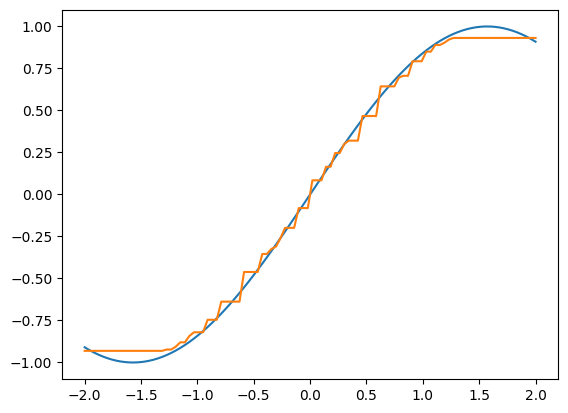

In [27]:
plt.plot(X[:, 0], y)
plt.plot(X[:, 0], pred)
plt.show()